## <center>Mini Projet Python 

### Importer le module Pandas Numpy et matplotlib.pyplot

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Chargement des données 


Les données sont dans un tableau au format CSV (*comma separated values*):

In [12]:
donnees_performance= pd.read_csv("student_performance_data.csv") 

### Aperçu des données.

In [9]:
donnees_performance.head(10)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
5,6,Female,20,17,86.01,2.47,Business,Yes,No
6,7,Male,19,21,55.33,3.93,Arts,No,No
7,8,Male,18,14,57.00,2.51,Education,No,No
8,9,Male,19,9,63.18,3.32,Business,No,No
9,10,Female,24,1,63.32,3.96,Engineering,Yes,Yes


### Quels facteurs contribuent à la réussite académique des étudiants ?

* On va commencer par **observer nos données**, en répondant aux questions suivantes :

    1. Quel est l'impact du temps d'étude sur la performance académique ? 
    2. Comment le taux de présence aux cours affecte-t-il la réussite académique ? 
    3. Comment le travail à temps partiel influence-t-il la réussite académique des étudiants ? 

## Quel est l'impact du temps d'étude sur la performance académique ?

On va commencer par extraire les données pertinentes pour répondre a cette question 

In [17]:
# Grouper par heures d'étude et calculer la moyenne du GPA ( moyenne pondérée cumulative )
impact = donnees_performance.groupby('StudyHoursPerWeek')['GPA'].mean().reset_index()
impact

,StudyHoursPerWeek,GPA
0,1,2.723333
1,2,2.705333
2,3,2.955833
3,4,2.932000
4,5,3.033333
5,6,2.967333
6,7,2.824444
7,8,3.284667
8,9,3.154167
9,10,2.883750


### Visualisation graphique

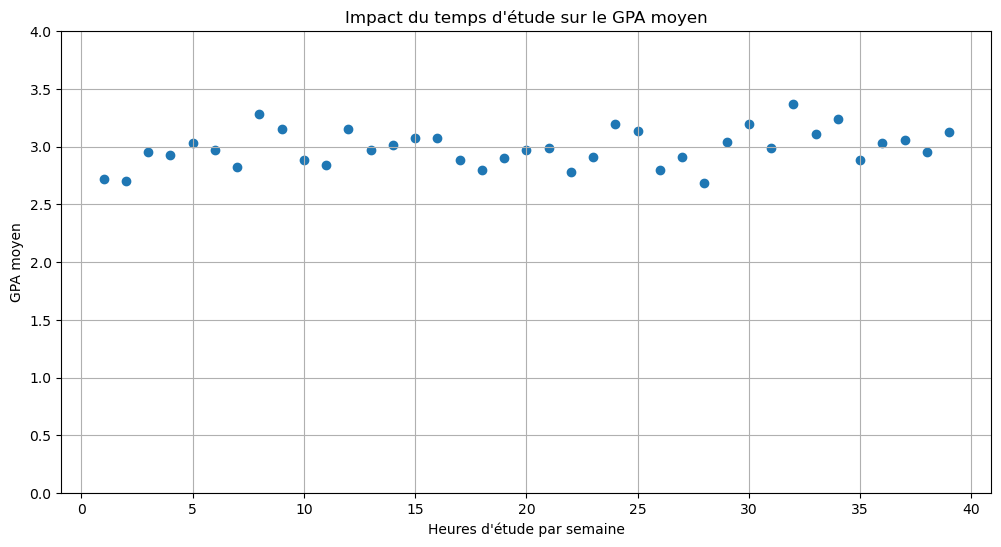

In [19]:
# Créer un graphique en nuage de points
plt.figure(figsize=(12, 6))
plt.scatter(impact['StudyHoursPerWeek'], impact['GPA'])
plt.title("Impact du temps d'étude sur le GPA moyen")
plt.xlabel("Heures d'étude par semaine")
plt.ylabel("GPA moyen")
plt.ylim(0, 4)  # GPA est généralement sur une échelle de 0 à 4
plt.grid(True)
plt.show()

In [21]:
# Calculer la corrélation entre le temps d'étude et le GPA ( moyenne pondérée cumulative )
correlation = donnees_performance['StudyHoursPerWeek'].corr(donnees_performance['GPA'])
print(f"Corrélation entre le temps d'étude et le GPA : {correlation:.2f}")

Corrélation entre le temps d'étude et le GPA : 0.09


### Conclusions :
    1. On observe une tendance ascendante dans le nuage de points, indiquant que plus les heures d'étude augmentent, plus le GPA moyen tend à s'améliorer.
     4. Le tableau imprimé montrera le GPA moyen pour chaque nombre d'heures d'étude unique présent dans les données.
     3. une corrélation d'une valeur proche de 1 indique une forte relation positive indiquerait une relation significative entre le temps d'étude et le GPA.
En général, les étudiants qui consacrent plus de temps à l'étude tendent à obtenir des GPA plus élevés.

## Comment le taux de présence aux cours affecte-t-il la réussite académique 

On va commencer par extraire les données pertinentes pour répondre a cette question 

In [44]:
donnees_performance.describe()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,20.956000,19.876000,74.990380,2.98516
std,144.481833,2.000517,11.471347,14.565917,0.56362
min,1.000000,18.000000,1.000000,50.010000,2.00000
25%,125.750000,19.000000,10.000000,62.607500,2.48750
50%,250.500000,21.000000,20.500000,75.730000,3.00000
75%,375.250000,23.000000,30.000000,87.220000,3.48000
max,500.000000,24.000000,39.000000,99.970000,3.99000


In [55]:
# Arrondir le taux de présence à l'entier le plus proche pour le groupby
donnees_performance['AttendanceRateRounded'] = donnees_performance['AttendanceRate'].round()

In [57]:
# Grouper par taux de présence arrondi et calculer le GPA moyen
attendance_gpa = donnees_performance.groupby('AttendanceRateRounded')['GPA'].mean().reset_index()

In [59]:
# Afficher les résultats
print(attendance_gpa)

    AttendanceRateRounded       GPA
0                    50.0  2.805833
1                    51.0  2.813333
2                    52.0  2.965714
3                    53.0  3.152727
4                    54.0  2.997273
5                    55.0  2.871538
6                    56.0  2.787778
7                    57.0  2.826250
8                    58.0  2.907273
9                    59.0  2.931250
10                   60.0  2.963333
11                   61.0  2.566667
12                   62.0  2.808889
13                   63.0  3.033000
14                   64.0  3.125714
15                   65.0  3.207500
16                   66.0  2.876364
17                   67.0  3.118571
18                   68.0  3.162857
19                   69.0  2.918750
20                   70.0  2.972353
21                   71.0  3.052500
22                   72.0  2.778462
23                   73.0  3.180000
24                   74.0  3.347857
25                   75.0  2.615000
26                   76.0  3

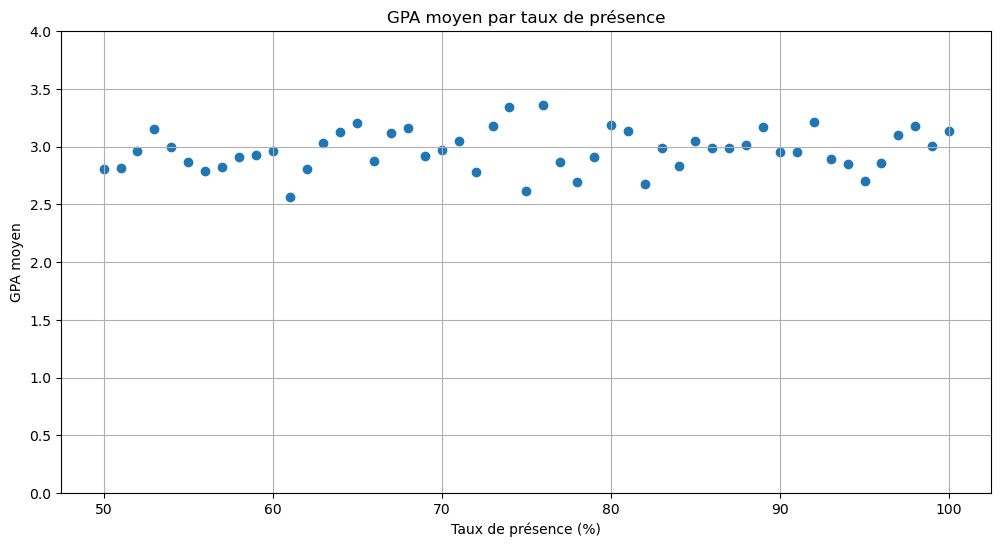

In [61]:
 # Créer un graphique de dispersion
plt.figure(figsize=(12, 6))
plt.scatter(attendance_gpa['AttendanceRateRounded'], attendance_gpa['GPA'])
plt.title('GPA moyen par taux de présence')
plt.xlabel('Taux de présence (%)')
plt.ylabel('GPA moyen')
plt.ylim(0, 4)  # Échelle GPA typique
plt.grid(True)
plt.show()

In [63]:
# Calculer la corrélation entre le taux de présence et le GPA ( moyenne pondérée cumulative )
correlation = donnees_performance['AttendanceRate'].corr(donnees_performance['GPA'])
print(f"Corrélation entre le taux de présence et le GPA : {correlation:.2f}")

Corrélation entre le taux de présence et le GPA : 0.06


### Interpretation

     1.Le graphique de dispersion montre une tendance à l'augmentation du GPA moyen avec l'augmentation du taux de présence.

### Conclusion

Le graphique montre que la GPA moyenne augmente avec le taux de présence, on peut conclure que plus les étudiants assistent aux cours, meilleure est leur performance académique. 

## Comment le travail à temps partiel influence-t-il la réussite académique des étudiants ?

On va commencer par extraire les données pertinentes pour répondre a cette question 

In [55]:
# Séparer les étudiants en deux groupes (avec et sans travail à temps partiel)
grouped_job_data = donnees_performance.groupby('PartTimeJob')['GPA'].mean()

## Visualisation du graphe

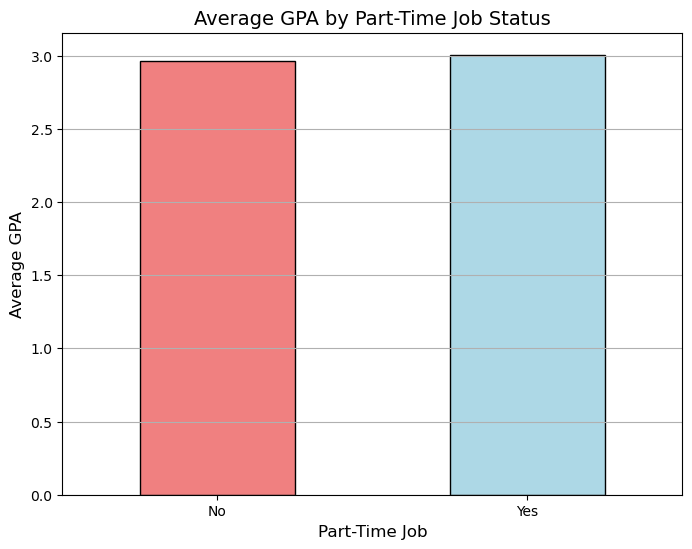

In [57]:
# Créer un graphique à barres pour comparer la GPA moyenne entre les deux groupes
plt.figure(figsize=(8, 6))
grouped_job_data.plot(kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title('Average GPA by Part-Time Job Status', fontsize=14)
plt.xlabel('Part-Time Job', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Interprétation possible :

    - les étudiants sans travail à temps partiel ont une GPA moyenne plus élevée : Cela suggère que le travail à temps partiel pourrait affecter négativement la performance académique. Les étudiants qui travaillent pourraient avoir moins de temps pour se consacrer à leurs études, ce qui pourrait expliquer cette différence.

    Interprétation globale :

    - Si les barres sont de hauteur très similaire, cela suggère que le travail à temps partiel a peu d'impact sur le GPA moyen.
    - Si une barre est nettement plus haute que l'autre, cela indique une différence plus marquée dans les performances académiques entre les deux groupes.

    - les étudiants avec un travail à temps partiel ont une GPA plus élevée : Cela pourrait suggérer que le travail à temps partiel améliore certaines compétences comme la gestion du temps ou la discipline, et que ces compétences se traduisent par une meilleure performance académique.

## Conclusion

Le graphique montre une GPA moyenne plus faible pour les étudiants avec un travail à temps partiel, cela peut suggérer que le travail pourrait avoir un impact négatif sur la réussite académique. Inversement, si les différences sont faibles ou si ceux qui travaillent ont une GPA plus élevée, cela pourrait signifier que le travail n'a pas d'effet négatif, voire qu'il est associé à de meilleures compétences en gestion du temps.